# Connect Drive Storage

In [1]:
# IMPORT NEEDED PACKAGE
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/dataset.zip" -d "/content/drive/MyDrive/Colab Notebooks"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Colab Notebooks/dataset/Training/notumor/Tr-no_1020.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/dataset/Training/notumor/Tr-no_0458.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/dataset/Training/notumor/Tr-no_0504.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/dataset/Training/notumor/Tr-no_0262.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/dataset/Training/notumor/Tr-no_0276.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/dataset/Training/notumor/Tr-no_1168.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/dataset/Training/notumor/Tr-no_0510.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/dataset/Training/notumor/Tr-no_0538.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/dataset/Training/notumor/Tr-no_1140.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/dataset/Training/notumor/Tr-no_1154.jpg  
  inflati

# Import Needed Packages

In [3]:
#OS libs
import os
import shutil
import itertools
import pathlib
from PIL import Image

#Data handling tools
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report

#Deep learning libs
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Activation , Dense , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers

#Warningds
import warnings
warnings.filterwarnings('ignore')

# Combine Dataset

In [4]:
train_data_path = "/content/drive/MyDrive/Colab Notebooks/dataset/Training"

filepaths = []
labels = []

folds = os.listdir(train_data_path)

for fold in folds:
  f_path = os.path.join(train_data_path, fold)
  if os.path.isdir(f_path):
    for file_name in os.listdir(f_path):
      filepaths.append(os.path.join(f_path, file_name))
      labels.append(fold)

#concat data paths with labels
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis=1)

In [5]:
train_df.head()

,filepaths,labels
0,/content/drive/MyDrive/Colab Notebooks/dataset...,pituitary
1,/content/drive/MyDrive/Colab Notebooks/dataset...,pituitary
2,/content/drive/MyDrive/Colab Notebooks/dataset...,pituitary
3,/content/drive/MyDrive/Colab Notebooks/dataset...,pituitary
4,/content/drive/MyDrive/Colab Notebooks/dataset...,pituitary


In [6]:
test_data_path = "/content/drive/MyDrive/Colab Notebooks/dataset/Testing"

filepaths = []
labels = []

folds = os.listdir(test_data_path)

for fold in folds:
  f_path = os.path.join(test_data_path, fold)
  if os.path.isdir(f_path):
    for file_name in os.listdir(f_path):
      filepaths.append(os.path.join(f_path, file_name))
      labels.append(fold)

#concat data paths with labels
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')
test_df = pd.concat([Fseries, Lseries], axis=1)

In [7]:
test_df

,filepaths,labels
0,/content/drive/MyDrive/Colab Notebooks/dataset...,pituitary
1,/content/drive/MyDrive/Colab Notebooks/dataset...,pituitary
2,/content/drive/MyDrive/Colab Notebooks/dataset...,pituitary
3,/content/drive/MyDrive/Colab Notebooks/dataset...,pituitary
4,/content/drive/MyDrive/Colab Notebooks/dataset...,pituitary
...,...,...
1306,/content/drive/MyDrive/Colab Notebooks/dataset...,meningioma
1307,/content/drive/MyDrive/Colab Notebooks/dataset...,meningioma
1308,/content/drive/MyDrive/Colab Notebooks/dataset...,meningioma
1309,/content/drive/MyDrive/Colab Notebooks/dataset...,meningioma


In [8]:
valid, test = train_test_split(test_df, test_size=0.5,shuffle=True, random_state=42)

In [9]:
# Periksa DataFrame pelatihan
print("Kolom train_df:", train_df.columns.tolist())

# Periksa DataFrame validasi
print("Kolom valid:", valid.columns.tolist())

# Periksa DataFrame pengujian
print("Kolom test:", test.columns.tolist())

Kolom train_df: ['filepaths', 'labels']
Kolom valid: ['filepaths', 'labels']
Kolom test: ['filepaths', 'labels']


In [10]:
img_size = (224 ,244)
batch_size = 16

tr_gen = ImageDataGenerator()
ts_gen= ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(train_df , x_col = 'filepaths' , y_col = 'labels' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode = 'rgb' , shuffle = True , batch_size =batch_size)

valid_gen = ts_gen.flow_from_dataframe(valid , x_col = 'filepaths' , y_col = 'labels' , target_size = img_size ,
                                       class_mode = 'categorical',color_mode = 'rgb' , shuffle= True, batch_size = batch_size)

test_gen = ts_gen.flow_from_dataframe(test , x_col= 'filepaths' , y_col = 'labels' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode= 'rgb' , shuffle = False , batch_size = batch_size)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


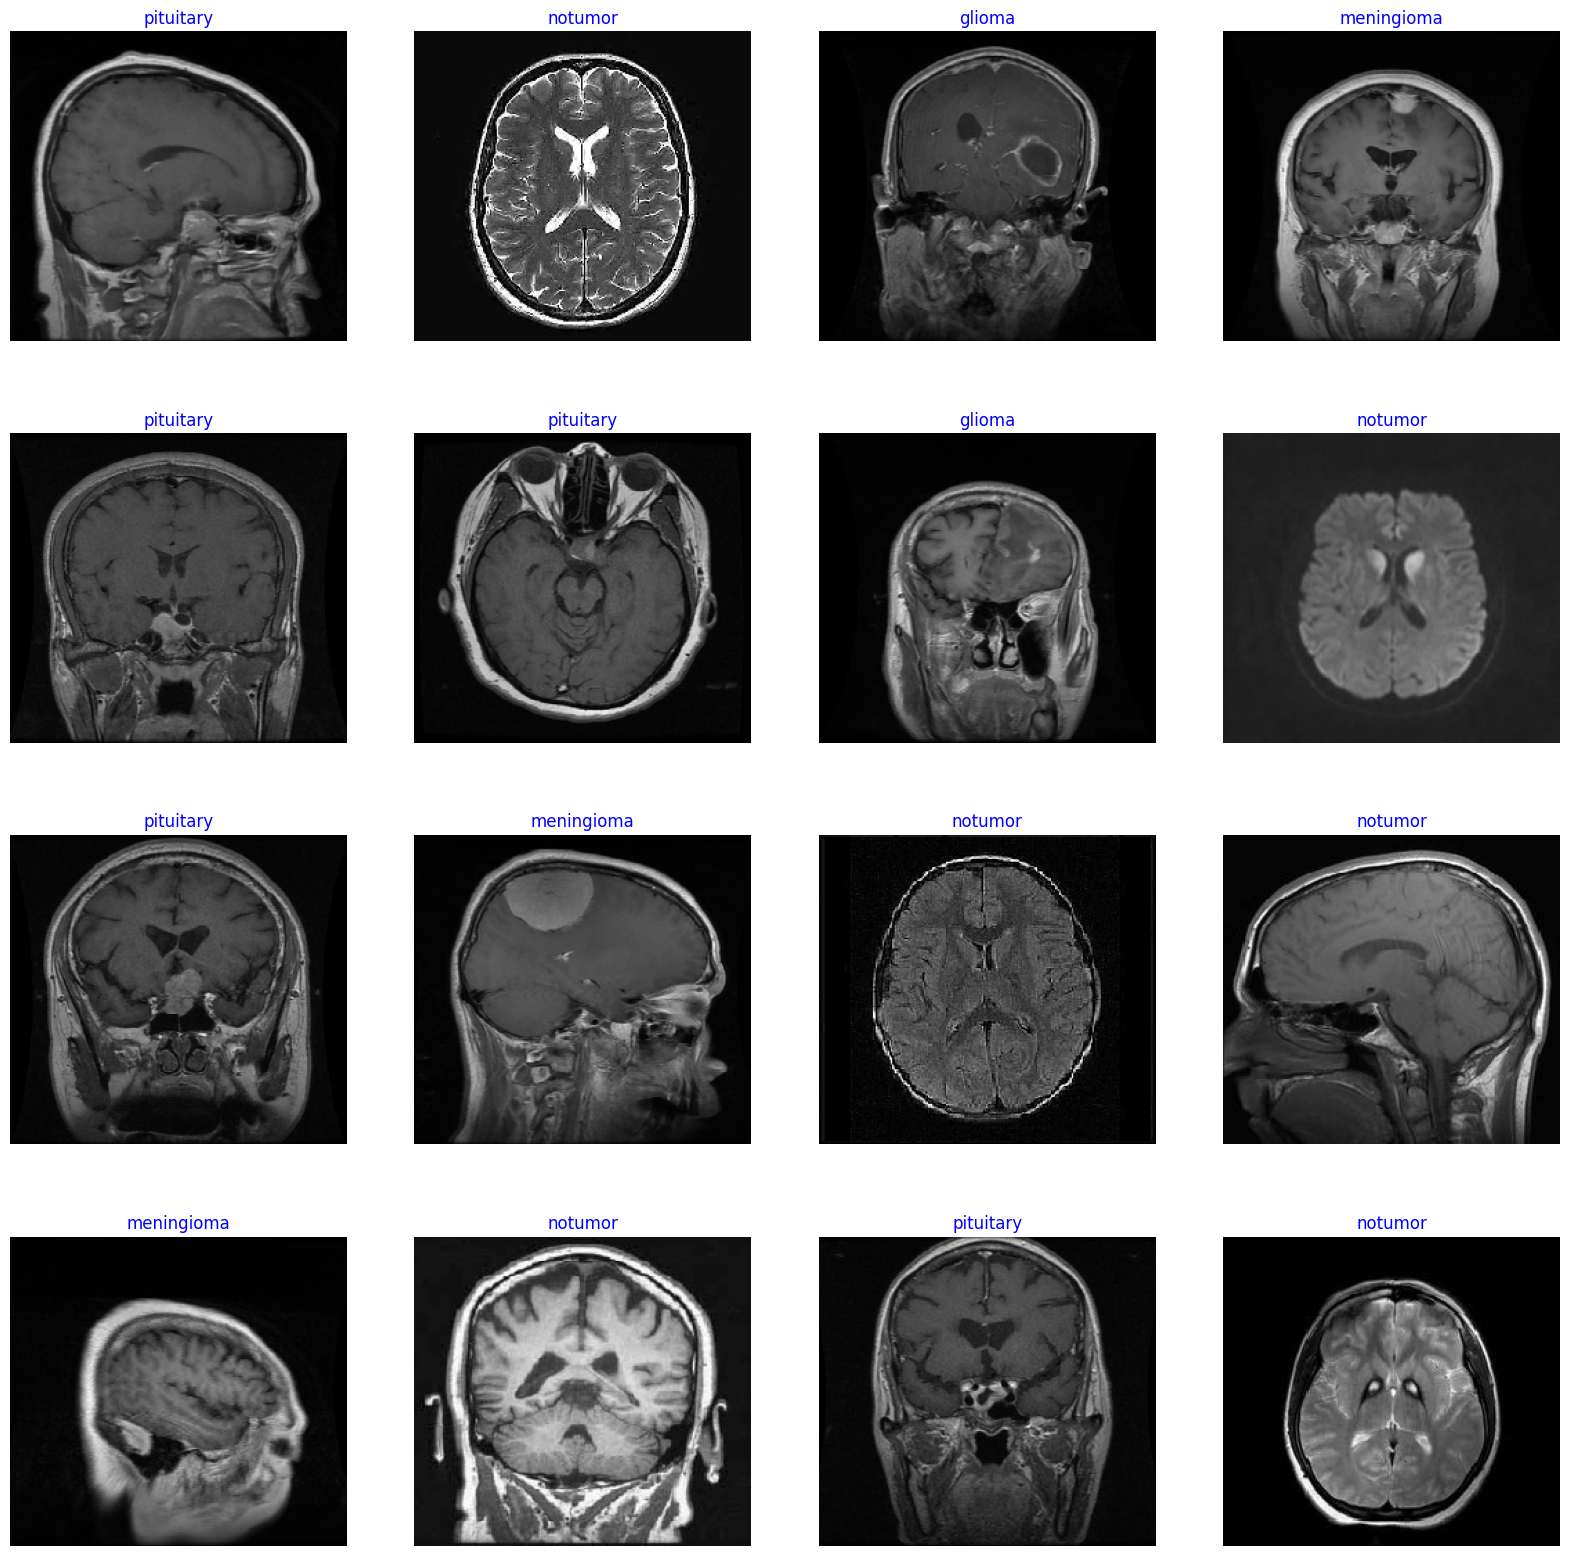

In [11]:
gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())
images, labels = next(train_gen)

plt.figure(figsize=(20,20))
for i in range(16):
  plt.subplot(4,4,i+1)
  image = images[i] / 255
  plt.imshow(image)
  index = np.argmax(labels[i])
  class_name = classes[index]
  plt.title(class_name, color = 'blue', fontsize = 12)
  plt.axis('off')
plt.show();

# Building Model Layer

In [12]:
img_shape = (img_size[0] , img_size[1] , 3)
num_class = len(classes)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top = False , weights = 'imagenet',
    input_shape = img_shape, pooling= 'max')

model = Sequential([
    base_model,
    BatchNormalization(axis= -1 , momentum= 0.99 , epsilon= 0.001),
    Dense(256, kernel_regularizer = regularizers.l2(0.016) , activity_regularizer = regularizers.l1(0.006),
         bias_regularizer= regularizers.l1(0.006) , activation = 'relu'),
    Dropout(rate= 0.4 , seed = 75),
    Dense(num_class , activation = 'softmax')
])

model.compile(Adamax(learning_rate = 0.001) , loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b0 (Functional)  │ (None, 1280)           │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,253,396 (23.85 MB)

 Trainable params: 6,190,228 (23.61 MB)

 Non-trainable params: 63,168 (246.75 KB)

In [13]:
Epochs = 10

history = model.fit(
    train_gen,
    epochs = Epochs,
    verbose=1,
    validation_data = valid_gen,
    shuffle=True
)

Epoch 1/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 4098s 11s/step - accuracy: 0.4908 - loss: 10.2564 - val_accuracy: 0.3191 - val_loss: 5.4606
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 35s 97ms/step - accuracy: 0.3029 - loss: 4.9639 - val_accuracy: 0.3176 - val_loss: 3.6808
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 34s 95ms/step - accuracy: 0.2867 - loss: 3.3558 - val_accuracy: 0.3038 - val_loss: 2.6323
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 34s 96ms/step - accuracy: 0.2869 - loss: 2.4576 - val_accuracy: 0.3008 - val_loss: 2.0547
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 35s 97ms/step - accuracy: 0.2673 - loss: 1.9528 - val_accuracy: 0.3008 - val_loss: 1.7081
Epoch 6/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 36s 101ms/step - accuracy: 0.2792 - loss: 1.6596 - val_accuracy: 0.3053 - val_loss: 1.5439
Epoch 7/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 34s 95ms/step - accuracy: 0.2866 - loss: 1.5239 - val_accuracy: 0.3008 - val_loss: 1.4643
Epoch 8/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 34s 95ms/step - accuracy: 0.2821 - loss: 1.4532

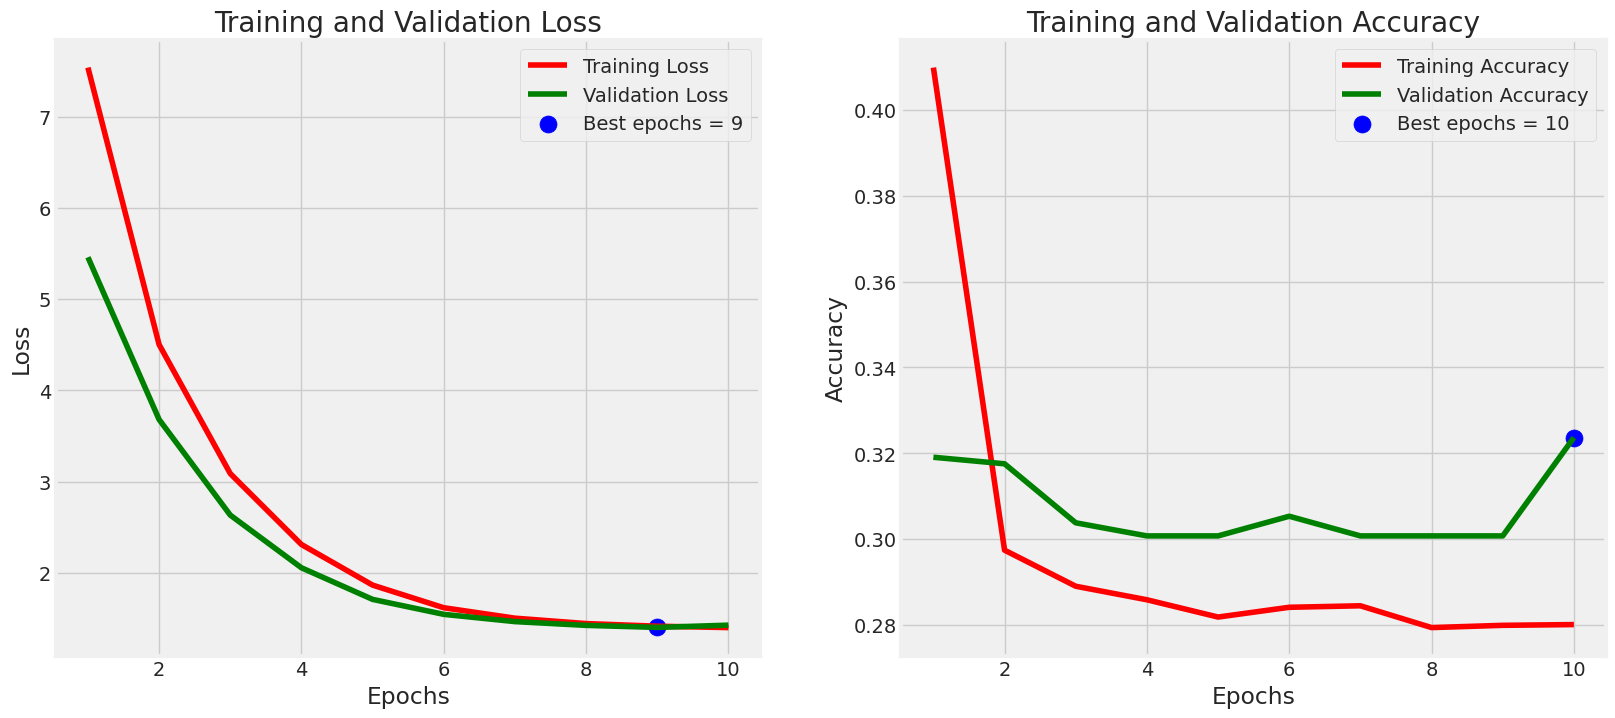

In [14]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

index_acc = np.argmax(val_acc)
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best epochs = {str(index_loss +1)}'
acc_label = f'Best epochs = {str(index_acc + 1)}'

#Training history

plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r' , label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss + 1 , val_lowest , s = 150 , c = 'blue',label = loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r' , label = 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , val_highest , s = 150 , c = 'blue',label = acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show();

In [15]:
train_score = model.evaluate(train_gen , steps =16 , verbose = 1)
valid_score = model.evaluate(valid_gen , steps = 16 , verbose = 1)
test_score = model.evaluate(test_gen , steps = 16 , verbose = 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.3027 - loss: 1.4254
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.2674 - loss: 1.4353
16/16 ━━━━━━━━━━━━━━━━━━━━ 143s 10s/step - accuracy: 0.3177 - loss: 1.4275
Train Loss:  1.432690978050232
Train Accuracy:  0.2890625
--------------------
Validation Loss:  1.4264357089996338
Validation Accuracy:  0.28125
--------------------
Test Loss:  1.441920518875122
Test Accuracy:  0.3203125


In [16]:
preds = model.predict(test_gen)

y_pred = np.argmax(preds , axis = 1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 256s 6s/step


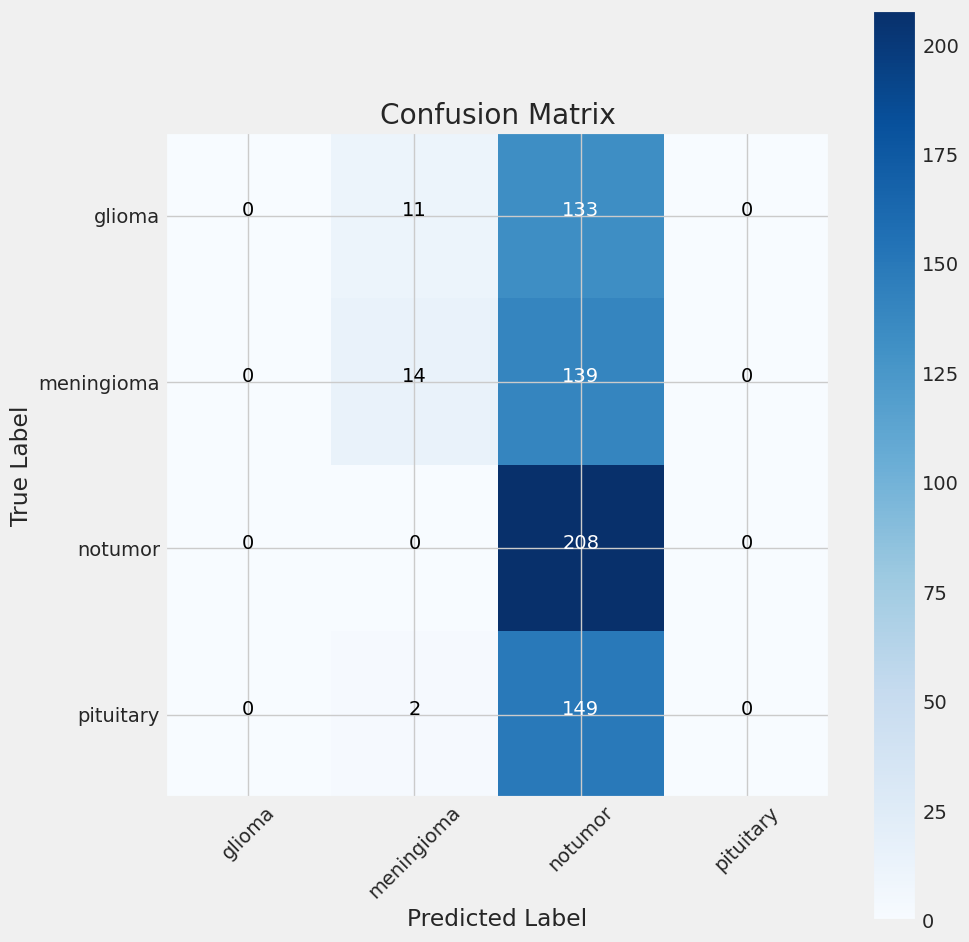

In [17]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [18]:
#Classification Report
print(classification_report(test_gen.classes, y_pred , target_names= classes ))

              precision    recall  f1-score   support

      glioma       0.00      0.00      0.00       144
  meningioma       0.52      0.09      0.16       153
     notumor       0.33      1.00      0.50       208
   pituitary       0.00      0.00      0.00       151

    accuracy                           0.34       656
   macro avg       0.21      0.27      0.16       656
weighted avg       0.23      0.34      0.19       656



# Saving Model

In [19]:
model.save("model.h5")

In [20]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

In [21]:
model = load_model('model.h5', compile=False)
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [22]:
gambar = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/Colab Notebooks/dataset/Testing/glioma/Te-glTr_0000.jpg', target_size=img_size)

In [23]:
input_arr = tf.keras.preprocessing.image.img_to_array(gambar)

In [24]:
input_arr = np.array([input_arr])
prediksi = model.predict(input_arr)
predicted_class = np.argmax(prediksi, axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step


In [25]:
print(classes)

['glioma', 'meningioma', 'notumor', 'pituitary']


In [26]:
print(predicted_class)

[2]


In [27]:
names = [classes[i] for i in predicted_class]
print(names)

['notumor']
